<a href="https://colab.research.google.com/github/Anacsdias/Anacsdias/blob/main/Netflix_Title.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎬 **Análise do catálogo da Netflix de 2021: Explorando filmes e dados** <br>

Neste projeto nós, Ana Clara Dias e Livia Fornazari, conduzimos uma análise detalhada dos filmes disponíveis no catálogo da Netflix em 2021. Utilizando técnicas de análise de dados, buscamos identificar padrões e informações relevantes sobre características, temas e diretores. Essa análise tem o potencial de fornecer insights valiosos para profissionais da indústria cinematográfica, auxiliando na tomada de decisões estratégicas e impulsionando o sucesso no mundo do entretenimento.

Para essa análise, utilizamos um conjunto de dados abrangente que contém informações detalhadas sobre os filmes da Netflix em 2021, como gênero, duração e direção. Buscamos identificar tendências, preferências do público, mudanças ao longo do tempo e fatores que possam influenciar o desempenho dos filmes no serviço de streaming.

Neste projeto, por meio da análise do catálogo da Netflix de 2021, buscamos beneficiar tanto a empresa, auxiliando na seleção futura de conteúdo, quanto os profissionais do setor, ajudando na criação de histórias que atraiam o público. Com decisões embasadas em evidências, visamos aumentar as chances de sucesso e melhorar a experiência dos espectadores. Compartilharemos nossas descobertas e conclusões, contribuindo para a compreensão do processo por trás dos lançamentos de filmes na Netflix e impulsionando o avanço estratégico da indústria cinematográfica.







## **📊 Perguntas Base para a Análise** <br>
📽️ 1. Qual o genêro com maior quantidade de filmes no catálogo? <br>
📺 2. Houve mudanças na duração dos filmes ao longo do tempo? <br>
📹 3. O gênero do filme influencia em sua duração? <br>
🎞️ 4. Quais diretores tem mais filmes e qual o gênero predominantes em seus filmes <br>
🎥 5. A Netflix oferece mais filmes de qual ano/epoca? <br>




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('netflix_titles.csv')

In [ ]:
dados

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
movie = dados[dados['type'] == 'movie']


In [ ]:
#primeiro verificamos se tem algum filme sem nome de diretor, pois a principio este será um dado necessario

todos_têm_director = movie['director'].notnull().all()

if todos_têm_director:
    print("Todos os filmes têm um nome de diretor especificado.")
else:
    print("Existem filmes sem um nome de diretor especificado.")

Todos os filmes têm um nome de diretor especificado.


In [ ]:
#verificamos o numero de respostas nas colunas, para saber quais estão faltando mais dados
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
dados.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Retiramos do dataset as colunas e linhas que não serão utilizadas para que os dados fiquem menores e mais faceis de visualizar

dados_filtrados = dados.drop(dados[dados['type'] == 'TV Show'].index)
colunas_apagar = ['show_id', 'cast', 'country', 'description', 'rating', 'type']
filtrados = dados_filtrados.drop(colunas_apagar, axis=1)

In [ ]:
filtrados

,title,director,date_added,release_year,duration,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,90 min,Documentaries
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,91 min,Children & Family Movies
7,Sankofa,Haile Gerima,"September 24, 2021",1993,125 min,"Dramas, Independent Movies, International Movies"
9,The Starling,Theodore Melfi,"September 24, 2021",2021,104 min,"Comedies, Dramas"
12,Je Suis Karl,Christian Schwochow,"September 23, 2021",2021,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...
8801,Zinzana,Majid Al Ansari,"March 9, 2016",2015,96 min,"Dramas, International Movies, Thrillers"
8802,Zodiac,David Fincher,"November 20, 2019",2007,158 min,"Cult Movies, Dramas, Thrillers"
8804,Zombieland,Ruben Fleischer,"November 1, 2019",2009,88 min,"Comedies, Horror Movies"
8805,Zoom,Peter Hewitt,"January 11, 2020",2006,88 min,"Children & Family Movies, Comedies"


In [ ]:
#Verificamos quais as linhas faltavam nome do diretor para que pudesse analisar oque poderia fazer a partir dessa informação
linhas_faltantes = filtrados[filtrados.isnull().any(axis=1)]


In [ ]:
linhas_faltantes

,title,director,date_added,release_year,duration,listed_in
404,9to5: The Story of a Movement,NaN,"July 22, 2021",2021,85 min,Documentaries
470,Bridgerton - The Afterparty,NaN,"July 13, 2021",2021,39 min,Movies
483,Last Summer,NaN,"July 9, 2021",2021,102 min,"Dramas, International Movies, Romantic Movies"
641,Sisters on Track,NaN,"June 24, 2021",2021,97 min,"Documentaries, Sports Movies"
717,Headspace: Unwind Your Mind,NaN,"June 15, 2021",2021,273 min,Documentaries
...,...,...,...,...,...,...
8231,The Bund,NaN,"September 20, 2018",1983,103 min,"Action & Adventure, Dramas, International Movies"
8268,The Darkest Dawn,NaN,"June 23, 2018",2016,75 min,"Action & Adventure, Independent Movies, Intern..."
8330,The Great Battle,NaN,"April 8, 2019",2018,136 min,"Action & Adventure, Dramas, International Movies"
8647,"Twisted Trunk, Big Fat Body",NaN,"January 15, 2017",2015,89 min,"Dramas, International Movies"


In [ ]:
#Percebemos que os titulos sem nome do diretor são em grande maioria series de TV e por isso resolvi tira-las para analisar apenas os filmes do catalogo
dados_sem_nulos = filtrados.dropna(subset=['director'])


In [ ]:
dados_sem_nulos

,title,director,date_added,release_year,duration,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,90 min,Documentaries
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,91 min,Children & Family Movies
7,Sankofa,Haile Gerima,"September 24, 2021",1993,125 min,"Dramas, Independent Movies, International Movies"
9,The Starling,Theodore Melfi,"September 24, 2021",2021,104 min,"Comedies, Dramas"
12,Je Suis Karl,Christian Schwochow,"September 23, 2021",2021,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...
8801,Zinzana,Majid Al Ansari,"March 9, 2016",2015,96 min,"Dramas, International Movies, Thrillers"
8802,Zodiac,David Fincher,"November 20, 2019",2007,158 min,"Cult Movies, Dramas, Thrillers"
8804,Zombieland,Ruben Fleischer,"November 1, 2019",2009,88 min,"Comedies, Horror Movies"
8805,Zoom,Peter Hewitt,"January 11, 2020",2006,88 min,"Children & Family Movies, Comedies"


In [ ]:
#Após isso verifiicamos que tinha uma dataset praticamente completo
dados_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5943 non-null   object
 1   director      5943 non-null   object
 2   date_added    5943 non-null   object
 3   release_year  5943 non-null   int64 
 4   duration      5940 non-null   object
 5   listed_in     5943 non-null   object
dtypes: int64(1), object(5)
memory usage: 325.0+ KB


In [ ]:
#Analisamos os titulos baseados em qual genero eles estão classificados e percebi que os generos eram muito detalhados e com isso ficava dificil o agrupamento

dados_sem_nulos["listed_in"].value_counts()

Dramas, International Movies                               361
Documentaries                                              334
Stand-Up Comedy                                            309
Comedies, Dramas, International Movies                     271
Dramas, Independent Movies, International Movies           252
                                                          ... 
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Comedies, Cult Movies, Sci-Fi & Fantasy                      1
International Movies, Romantic Movies, Sci-Fi & Fantasy      1
Comedies, Music & Musicals, Sports Movies                    1
Cult Movies, Dramas, Thrillers                               1
Name: listed_in, Length: 276, dtype: int64

In [ ]:
lista_completa = dados_sem_nulos["listed_in"].value_counts()
dados_sem_nulos


,title,director,date_added,release_year,duration,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,90 min,Documentaries
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,91 min,Children & Family Movies
7,Sankofa,Haile Gerima,"September 24, 2021",1993,125 min,"Dramas, Independent Movies, International Movies"
9,The Starling,Theodore Melfi,"September 24, 2021",2021,104 min,"Comedies, Dramas"
12,Je Suis Karl,Christian Schwochow,"September 23, 2021",2021,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...
8801,Zinzana,Majid Al Ansari,"March 9, 2016",2015,96 min,"Dramas, International Movies, Thrillers"
8802,Zodiac,David Fincher,"November 20, 2019",2007,158 min,"Cult Movies, Dramas, Thrillers"
8804,Zombieland,Ruben Fleischer,"November 1, 2019",2009,88 min,"Comedies, Horror Movies"
8805,Zoom,Peter Hewitt,"January 11, 2020",2006,88 min,"Children & Family Movies, Comedies"


In [ ]:
#Então criamos um dicionario para agrupar os generos de forma mais simples e com menor numero de grupos para facilitar a análise
genero = {'Dramas, International Movies': 'Drama',
    'Documentaries': 'Documentario',
    'Stand-Up Comedy': 'Stand-Up Comedy',
    'Comedies, Dramas, International Movies': 'Comedia',
    'Dramas, Independent Movies, International Movies': 'Drama',
    'Children & Family Movies, Comedies': 'Para Familia',
    'Children & Family Movies': 'Para Familia',
    'Documentaries, International Movies': 'Documentario',
    'Dramas, International Movies, Romantic Movies': 'Drama',
    'Comedies, International Movies': 'Comedia',
    'Comedies, International Movies, Romantic Movies': 'Comedia Romantica',
    'Dramas': 'Drama',
    'Dramas, International Movies, Thrillers': 'Drama',
    'Action & Adventure, Dramas, International Movies': 'Ação e Aventura',
    'Action & Adventure': 'Ação e Aventura',
    'Comedies, Dramas, Independent Movies': 'Comedia',
    'Comedies': 'Comedia',
    'Dramas, Independent Movies': 'Drama',
    'Action & Adventure, International Movies': 'Ação e Aventura',
    'Dramas, Thrillers': 'Drama',
    'Comedies, Romantic Movies': 'Comedia Romantica',
    'Documentaries, Music & Musicals': 'Documentario',
    'Action & Adventure, Comedies, International Movies': 'Ação e Aventura',
    'International Movies, Thrillers': 'Suspense',
    'Thrillers': 'Suspense',
    'Action & Adventure, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Documentaries, Sports Movies': 'Documentario',
    'Horror Movies, International Movies': 'Terror',
    'Horror Movies': 'Terror',
    'Dramas, International Movies, Music & Musicals': 'Drama',
    'Comedies, International Movies, Music & Musicals': 'Comedia',
    'Horror Movies, Thrillers': 'Terror',
    'Dramas, Romantic Movies': 'Drama',
    'Action & Adventure, Comedies': 'Ação e Aventura',
    'Horror Movies, International Movies, Thrillers': 'Terror',
    'Documentaries, International Movies, Sports Movies': 'Documentario',
    'Action & Adventure, Anime Features, International Movies': 'Ação e Aventura',
    'Documentaries, International Movies, Music & Musicals': 'Documentario',
    'Movies': 'Outros',
    'Action & Adventure, Dramas': 'Ação e Aventura',
    'Dramas, Independent Movies, Thrillers': 'Drama',
    'Children & Family Movies, Dramas': 'Para Familia',
    'Comedies, Dramas': 'Comedia',
    'Action & Adventure, Comedies, Dramas': 'Ação e Aventura',
'Dramas, International Movies, Sports Movies': 'Drama',
    'Comedies, Independent Movies': 'Comedia',
    'Dramas, Independent Movies, Romantic Movies': 'Drama',
    'Comedies, Independent Movies, International Movies': 'Comedia',
    'Children & Family Movies, Music & Musicals': 'Para Familia',
    'Dramas, Sports Movies': 'Drama',
    'Comedies, Dramas, Romantic Movies': 'Comedia',
    'Horror Movies, Independent Movies': 'Terror',
    'International Movies, Romantic Movies': 'Romance',
    'Dramas, Faith & Spirituality': 'Drama',
    'Documentaries, LGBTQ': 'Documentario',
    'Dramas, Independent Movies, LGBTQ Movies': 'Drama',
    'Classic Movies, Dramas, International Movies': 'Classicos',
    'Children & Family Movies, Comedies, Dramas': 'Para Familia',
    'Horror Movies, Independent Movies, Thrillers': 'Terror',
    'Action & Adventure, International Movies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Children & Family Movies, Comedies, Music & Musicals': 'Para Familia',
    'Comedies, Horror Movies, International Movies': 'Comedia',
    'Action & Adventure, Dramas, Independent Movies': 'Ação e Aventura',
    'Comedies, Horror Movies': 'Comedia',
    'Dramas, International Movies, Sci-Fi & Fantasy': 'Drama',
    'Sci-Fi & Fantasy, Thrillers': 'Ficção e Fantasia',
    'Dramas, International Movies, LGBTQ Movies': 'Drama',
    'Comedies, Cult Movies': 'Comedia',
    'Dramas, Faith & Spirituality, International Movies': 'Drama',
    'Children & Family Movies, Dramas, International Movies': 'Para Familia',
    'Classic Movies, Documentaries': 'Classicos',
    'Action & Adventure, Horror Movies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Independent Movies, Thrillers': 'Suspense',
    'Action & Adventure, International Movies, Music & Musicals': 'Ação e Aventura',
    'Classic Movies, Dramas': 'Classicos',
    'Horror Movies, Independent Movies, International Movies': 'Terror',
    'Music & Musicals': 'Musical',
    'Children & Family Movies, Comedies, Sci-Fi & Fantasy': 'Para Familia',
    'International Movies, Sci-Fi & Fantasy, Thrillers': 'Ficção e Fantasia',
    'Action & Adventure, Classic Movies, Dramas': 'Ação e Aventura',
    'Children & Family Movies, Dramas, Sports Movies': 'Para Familia',
    'Classic Movies, Dramas, Independent Movies': 'Classicos',
    'Action & Adventure, Comedies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Children & Family Movies, Comedies, Romantic Movies': 'Para Familia',
    'Comedies, Sports Movies': 'Comedia',
    'Children & Family Movies, Documentaries': 'Para Familia',
    'Comedies, International Movies, LGBTQ Movies': 'Comedia',
    'Children & Family Movies, Dramas, Romantic Movies': 'Para Familia',
    'Dramas, Independent Movies, Sports Movies': 'Drama',
    'Comedies, Independent Movies, Romantic Movies': 'Comedia',
    'Dramas, Independent Movies, Music & Musicals': 'Drama',
    'Documentaries, Faith & Spirituality': 'Documentario',
    'International Movies, Music & Musicals': 'Musical',
    'Children & Family Movies, Sci-Fi & Fantasy': 'Para Familia',
    'Dramas, Independent Movies, Sci-Fi & Fantasy': 'Drama',
    'Action & Adventure, Comedies, Independent Movies': 'Ação e Aventura',
    'Dramas, LGBTQ Movies': 'Drama',
    'Documentaries, International Movies, LGBTQ Movies': 'Documentario',
    'Dramas, Music & Musicals': 'Drama',
    'Music & Musicals, Stand-Up Comedy': 'Musical',
    'Comedies, Music & Musicals': 'Comedia',
    'Anime Features, Children & Family Movies': 'Anime',
    'Action & Adventure, Independent Movies': 'Ação e Aventura',
    'Action & Adventure, International Movies, Romantic Movies': 'Ação e Aventura',
    'Children & Family Movies, Dramas, Faith & Spirituality': 'Para Familia',
    'Comedies, International Movies, Sci-Fi & Fantasy': 'Comedia',
    'Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Horror Movies, Sci-Fi & Fantasy, Thrillers': 'Terror',
    'Dramas, Sci-Fi & Fantasy': 'Drama',
    'International Movies, Music & Musicals, Romantic Movies': 'Musical',
    'Action & Adventure, Documentaries, International Movies': 'Ação e Aventura',
    'Comedies, International Movies, Sports Movies': 'Comedia',
    'Comedies, Cult Movies, Dramas': 'Comedia',
    'Action & Adventure, Horror Movies': 'Ação e Aventura',
    'Action & Adventure, Independent Movies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Action & Adventure, Children & Family Movies, Comedies': 'Ação e Aventura',
    'Action & Adventure, Classic Movies': 'Ação e Aventura',
    'Action & Adventure, Horror Movies, International Movies' : 'Ação e Aventura',
    'Independent Movies, International Movies, Thrillers': 'Suspense',
    'Action & Adventure, Classic Movies, Cult Movies': 'Ação e Aventura',
    'Dramas, Sci-Fi & Fantasy, Thrillers': 'Drama',
    'Comedies, Horror Movies, Independent Movies': 'Comedia',
    'Action & Adventure, Dramas, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Cult Movies, Horror Movies': 'Terror',
    'Children & Family Movies, Sports Movies': 'Para Familia',
    'Comedies, Independent Movies, LGBTQ Movies': 'Comedia',
    'Comedies, International Movies, Thrillers': 'Comedia',
    'Children & Family Movies, Comedies, International Movies': 'Para Familia',
    'Dramas, Music & Musicals, Romantic Movies': 'Drama',
    'Dramas, Romantic Movies, Sci-Fi & Fantasy': 'Drama',
    'Action & Adventure, Cult Movies, International Movies': 'Drama',
    'Comedies, Dramas, LGBTQ Movies': 'Comedia',
    'Action & Adventure, Anime Features, Sci-Fi & Fantasy': 'Ação e Aventura',
    'International Movies, Sci-Fi & Fantasy': 'Ficção e Fantasia',
    'Action & Adventure, Comedies, Romantic Movies': 'Ação e Aventura',
    'Comedies, Horror Movies, Sci-Fi & Fantasy': 'Comedia',
    'Children & Family Movies, Documentaries, International Movies': 'Para Familia',
    'Comedies, Dramas, Music & Musicals': 'Comedia',
    'Action & Adventure, Children & Family Movies, Classic Movie': 'Ação e Aventura',
    'Action & Adventure, Comedies, Cult Movies': 'Ação e Aventura',
    'Horror Movies, Sci-Fi & Fantasy': 'Terror',
    'Action & Adventure, Anime Features, Children & Family Movies': 'Ação e Aventura',
    'Classic Movies, Comedies, Dramas': 'Classicos',
    'Action & Adventure, Thrillers': 'Ação e Aventura',
    'Action & Adventure, Classic Movies, Comedies': 'Ação e Aventura',
    'Comedies, Faith & Spirituality, International Movies': 'Comedia',
    'Children & Family Movies, Dramas, Independent Movies': 'Para Familia',
    'Comedies, Cult Movies, Horror Movies': 'Comedia',
    'Dramas, Romantic Movies, Sports Movies': 'Drama',
    'Documentaries, Faith & Spirituality, International Movies': 'Documentario',
    'Children & Family Movies, Comedies, Sports Movies': 'Para Familia',
    'Action & Adventure, Romantic Movies': 'Ação e Aventura',
    'Anime Features, Children & Family Movies, International Movies': 'Anime',
    'Horror Movies, Independent Movies, Sci-Fi & Fantasy': 'Terror',
    'Comedies, Cult Movies, International' : 'Comedia',
    'Independent Movies, Sci-Fi & Fantasy, Thrillers': 'Ficção e Fantasia',
    'Action & Adventure, Children & Family Movies, Dramas': 'Ação e Aventura',
    'Classic Movies, Comedies, Cult Movies': 'Classicos',
    'International Movies, LGBTQ Movies, Romantic Movies': 'Romance',
    'Romantic Movies': 'Romance',
    'Comedies, Sci-Fi & Fantasy': 'Comedia',
    'Classic Movies, Comedies, International': 'Classicos',
    'Action & Adventure, Cult Movies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Action & Adventure, Dramas, Sports Movies': 'Ação e Aventura',
    'Classic Movies, Dramas, Romantic Movies': 'Classicos',
    'Children & Family Movies, Classic Movies, Comedies': 'Para Familia',
    'Comedies, Independent Movies, Thrillers': 'Comedia',
    'Classic Movies, Dramas, Sports Movies': 'Classicos',
    'Anime Features, International Movies, Romantic Movies': 'Anime',
    'Classic Movies, Comedies, Music & Musicals': 'Classicos',
    'Documentaries, Stand-Up Comedy': 'Documentario',
    'Classic Movies, Cult Movies, Horror Movies': 'Classicos',
    'Horror Movies, International Movies, Romantic Movies': 'Terror',
    'International Movies, Music & Musicals, Thrillers': 'Musical',
    'Documentaries, LGBTQ Movies, Sports Movies': 'Documentario',
    'Documentaries, LGBTQ Movies, Music & Musicals': 'Documentario',
    'Action & Adventure, International Movies, Sports Movies': 'Ação e Aventura',
    'Action & Adventure, Horror Movies, Thrillers': 'Ação e Aventura',
    'Comedies, Cult Movies, Music & Musicals': 'Comedia',
    'Comedies, Dramas, Faith & Spirituality': 'Comedia',
    'Children & Family Movies, Independent Movies': 'Para Familia',
    'Documentaries, Horror Movies': 'Documentario',
    'Classic Movies, Cult Movies, Dramas': 'Classicos',
    'Documentaries, Dramas, International Movies': 'Documentario',
    'Classic Movies, Comedies, Independent Movies': 'Classicos',
    'Comedies, LGBTQ Movies': 'Comedia',
    'Cult Movies, Horror Movies, Independent Movies': 'Terror',
    'Comedies, Faith & Spirituality, Romantic Movies' : 'Comedia',
    'Classic Movies, Dramas, Music & Musicals': 'Classicos',
    'Children & Family Movies, Dramas, Music & Musicals': 'Para Familia',
    'Dramas, Faith & Spirituality, Romantic Movies': 'Drama',
    'Action & Adventure, Dramas, Faith & Spirituality': 'Ação e Aventura',
    'Action & Adventure, Anime Features, Classic Movies': 'Ação e Aventura',
    'Action & Adventure, Sports Movies': 'Ação e Aventura',
    'Comedies, Music & Musicals, Romantic Movies': 'Comedia',
    'International Movies, Romantic Movies, Thrillers': 'Romance',
    'Action & Adventure, Dramas, Romantic Movies': 'Ação e Aventura',
    'Horror Movies, LGBTQ Movies': 'Terror',
    'Anime Features, International Movies': 'Anime',
    'Action & Adventure, Independent Movies, International Movies': 'Ação e Aventura',
    'Action & Adventure, International Movies, Thrillers': 'Ação e Aventura',
    'Dramas, LGBTQ Movies, Romantic Movies': 'Drama',
    'Children & Family Movies, Documentaries, Sports Movies': 'Para Familia',
    'International Movies': 'Outros',
    'Anime Features, Music & Musicals, Sci-Fi & Fantasy': 'Anime',
    'Dramas, Romantic Movies, Thrillers': 'Drama',
    'Comedies, Dramas, Sports Movies': 'Comedia',
    'Classic Movies, Comedies, Sports Movies': 'Classicos',
    'Comedies, Cult Movies, LGBTQ Movies': 'Comedia',
    'Independent Movies': 'Outros',
    'Action & Adventure, Romantic Movies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Dramas, Horror Movies, Sci-Fi & Fantasy': 'Drama',
    'Action & Adventure, Comedies, Horror Movies': 'Ação e Aventura',
    'Action & Adventure, Documentaries, Sports Movies': 'Ação e Aventura',
    'Action & Adventure, Classic Movies, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Cult Movies, Horror Movies, Thrillers': 'Terror',
    'Children & Family Movies, Faith & Spirituality': 'Para Familia',
    'Children & Family Movies, Comedies, Faith & Spirituality': 'Para Familia',
    'Classic Movies, Independent Movies, Thrillers': 'Classicos',
    'Dramas, Horror Movies, Music & Musicals': 'Drama',
    'Action & Adventure, Comedies, Music & Musicals': 'Ação e Aventura',
    'Children & Family Movies, Classic Movies, Dramas': 'Para Familia',
    'Action & Adventure, Cult Movies': 'Ação e Aventura',
    'Dramas, Faith & Spirituality, Sports Movies' : 'Drama',
    'Classic Movies, Dramas, LGBTQ Movies': 'Classicos',
    'Classic Movies, Cult Movies, Documentaries': 'Classicos',
    'Cult Movies, Independent Movies, Thrillers': 'Suspense',
    'Action & Adventure, Classic Movies, International Movies': 'Ação e Aventura',
    'Action & Adventure, Children & Family Movies': 'Ação e Aventura',
    'Action & Adventure, Horror Movies, Independent Movies': 'Ação e Aventura',
    'Anime Features': 'Anime',
    'Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy': 'Ação e Aventura',
    'Dramas, Horror Movies, Thrillers': 'Drama',
    'Classic Movies, Horror Movies, Thrillers': 'Classicos',
    'Comedies, Cult Movies, Sports Movies': 'Comedia',
    'Classic Movies, Comedies, Romantic Movies': 'Classicos',
    'Children & Family Movies, Faith & Spirituality, Music & Musicals': 'Para Familia',
    'International Movies, Sports Movies': 'Outros',
    'Cult Movies, Dramas, International Movies': 'Drama',
    'Anime Features, Romantic Movies': 'Anime',
    'Action & Adventure, Sci-Fi & Fantasy, Thrillers': 'Ação e Aventura',
    'Anime Features, International Movies, Sci-Fi & Fantasy': 'Anime',
    'Comedies, Documentaries, International Movies': 'Comedia',
    'LGBTQ Movies, Thrillers': 'Suspense',
    'Action & Adventure, Comedies, Sports Movies': 'Ação e Aventura',
    'Action & Adventure, Sci-Fi & Fantasy, Sports Movies': 'Ação e Aventura',
    'Music & Musicals, Romantic Movies': 'Musical',
    'Children & Family Movies, Comedies, LGBTQ Movies': 'Para Familia',
    'Comedies, LGBTQ Movies, Music & Musicals': 'Comedia',
    'Documentaries, Dramas': 'Documentario',
    'Horror Movies, Romantic Movies, Sci-Fi & Fantasy': 'Terror',
    'Comedies, Romantic Movies, Sports Movies': 'Comedia',
    'Action & Adventure, Anime Features, Horror Movies': 'Ação e Aventura',
    'Cult Movies, Dramas, Music & Musicals': 'Drama',
    'Classic Movies, Music & Musicals': 'Classicos',
    'Anime Features, Music & Musicals': 'Anime',
    'Action & Adventure, Anime Features': 'Ação e Aventura',
    'Documentaries, Faith & Spirituality, Music & Musicals': 'Documentario',
    'Comedies, Independent Movies, Music & Musicals': 'Comedia',
    'Action & Adventure, Cult Movies, Dramas': 'Ação e Aventura',
    'Children & Family Movies, Classic Movies': 'Para Familia',
    'Classic Movies, Thrillers': 'Classicos',
    'Action & Adventure, Children & Family Movies, Independent Movies' : 'Ação e Aventura',
    'Sci-Fi & Fantasy': 'Ficção e Fantasia',
    'Children & Family Movies, Comedies, Cult Movies': 'Para Familia',
    'Comedies, Cult Movies, Independent Movies': 'Comedia',
    'Dramas, Faith & Spirituality, Independent Movies': 'Drama',
    'Horror Movies, LGBTQ Movies, Music & Musicals': 'Terror',
    'Action & Adventure, Children & Family Movies, Cult Movies': 'Ação e Aventura',
    'Comedies, Documentaries': 'Comedia',
    'Comedies, LGBTQ Movies, Thrillers': 'Comedia',
    'Horror Movies, International Movies, Sci-Fi & Fantasy': 'Terror',
    'Comedies, Cult Movies, Sci-Fi & Fantasy': 'Comedia',
    'International Movies, Romantic Movies, Sci-Fi & Fantasy': 'Romance',
    'Comedies, Music & Musicals, Sports Movies': 'Comedia',
    'Cult Movies, Dramas, Thrillers': 'Drama',
    'Children & Family Movies': 'Para Familia',
    'Documentaries, LGBTQ Movies' : 'Documentario',
    'Action & Adventure, Horror Movies, International Movies' : 'Ação e Aventura',
    'Comedies, Cult Movies, International Movies' : 'Comedia',
    'Action & Adventure, Children & Family Movies, Classic Movies' : 'Ação e Aventura',
    'Comedies, Faith & Spirituality, Romantic Movies' : 'Comedia',
    'Action & Adventure, Children & Family Movies, Independent Movies' : 'Ação e Aventura',
    'Comedies, Faith & Spirituality, Romantic Movies' : 'Comedia',
    'Classic Movies, Comedies, International Movies' : 'Classicos',
    'Comedies, International Movies, Music & Musicals' : 'Comedia',
    'Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy' : 'Ação e Aventura',
    'Action & Adventure, Children & Family Movies, Classic Movies' : 'Ação e Aventura',
    'Dramas, Faith & Spirituality, Sports Movies' : 'Drama',
    'Comedies, Cult Movies, International Movies' : "Comedia",

          }

In [ ]:
dados_sem_nulos["listed_in"] = dados_sem_nulos["listed_in"].map(genero)

<ipython-input-18-80b8dca7b37b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_nulos["listed_in"] = dados_sem_nulos["listed_in"].map(genero)


In [ ]:
#Verificamos o novo agrupamento da categoria
dados_sem_nulos["listed_in"].value_counts()

Drama                1595
Comedia               956
Ação e Aventura       846
Documentario          777
Para Familia          570
Stand-Up Comedy       309
Terror                282
Comedia Romantica     230
Suspense              150
Classicos              80
Outros                 38
Musical                34
Ficção e Fantasia      29
Romance                27
Anime                  20
Name: listed_in, dtype: int64

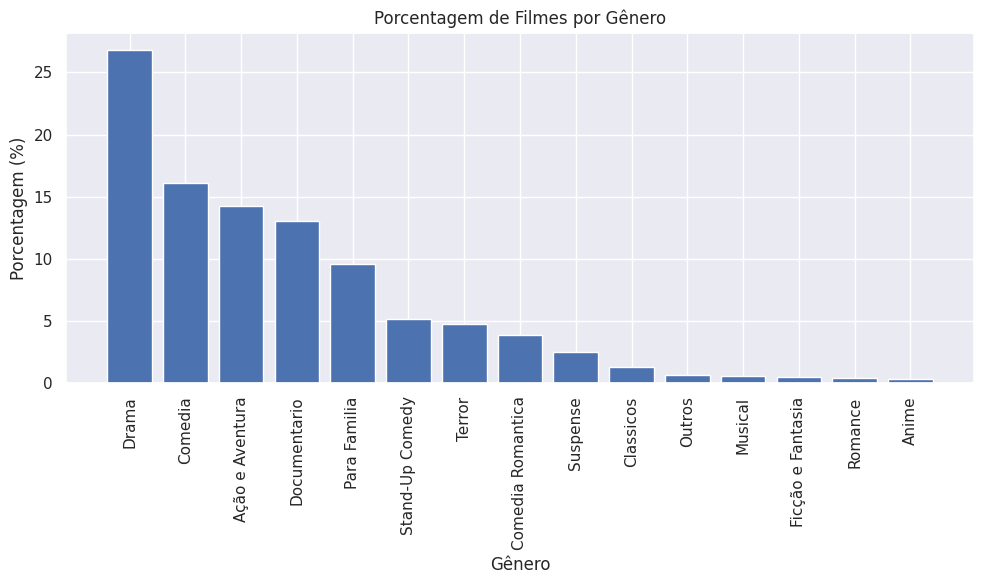

In [ ]:
generos = ['Drama', 'Comedia', 'Ação e Aventura', 'Documentario', 'Para Familia', 'Stand-Up Comedy',
           'Terror', 'Comedia Romantica', 'Suspense', 'Classicos', 'Outros', 'Musical', 'Ficção e Fantasia',
           'Romance', 'Anime']

quantidades = [1595, 956, 846, 777, 570, 309, 282, 230, 150, 80, 38, 34, 29, 27, 20]

total_filmes = sum(quantidades)
porcentagens = [(q / total_filmes) * 100 for q in quantidades]

plt.figure(figsize=(10, 6))
plt.bar(generos, porcentagens)
plt.xticks(rotation=90)
plt.xlabel('Gênero')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de Filmes por Gênero')
plt.tight_layout()
plt.show()

In [ ]:
#substituimos os filmes que estavam sem informação de tempo de duração para 0
dados_sem_nulos['duration'] = dados_sem_nulos['duration'].fillna(0)

<ipython-input-20-f0f738a539f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_nulos['duration'] = dados_sem_nulos['duration'].fillna(0)


In [ ]:
#Convertemos essa informação para numero inteiro
dados_sem_nulos['duration'] = dados_sem_nulos['duration'].str.extract('(\d+)').fillna(0).astype(int)

<ipython-input-21-f5131cacf2d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_nulos['duration'] = dados_sem_nulos['duration'].str.extract('(\d+)').fillna(0).astype(int)


In [ ]:
dados_sem_nulos['duration'] = dados_sem_nulos['duration'].astype(int)

<ipython-input-22-29d8a96775d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_nulos['duration'] = dados_sem_nulos['duration'].astype(int)


In [ ]:
#Fizemos com que os dados "0" fossem substituidos pela média da duração dos filmes do catalogo para facilitar a análise
grouped_dados_sem_nulos = dados_sem_nulos.groupby('release_year')['duration'].mean().reset_index()

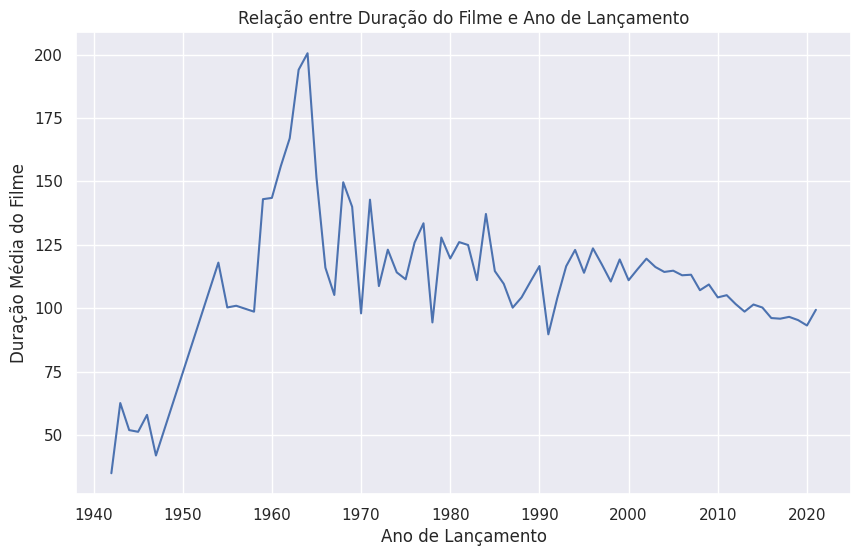

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_dados_sem_nulos, x='release_year', y='duration')
plt.title('Relação entre Duração do Filme e Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração Média do Filme')
plt.show()

In [ ]:
grupo_genero = dados_sem_nulos.groupby('listed_in')['duration'].mean()

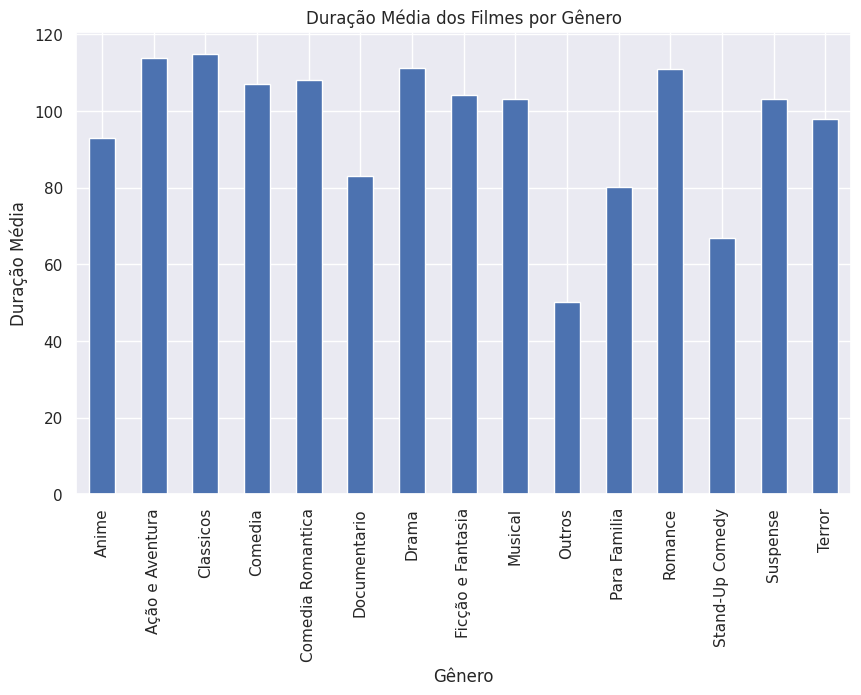

In [ ]:
plt.figure(figsize=(10, 6))
grupo_genero.plot(kind='bar')
plt.title('Duração Média dos Filmes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Duração Média')
plt.show()

In [ ]:
diretores = dados_sem_nulos.groupby("director").agg({'title': 'count'}).sort_values(by= 'title', ascending = False)


In [ ]:
diretores_genero = dados_sem_nulos.groupby('director').agg({
    'listed_in' : 'first',
    'title': ('count')
}).reset_index()
diretores_genero.columns = ['director', 'listed_in', 'title']

In [ ]:
diretores_genero = diretores_genero.sort_values(by='title', ascending = False)

In [ ]:
#Filtramos os diretores para saber quais diretores tem mais titulos no catálogo e quais são os generos que eles costumam dirigir
diretores_genero

,director,listed_in,title
3252,Rajiv Chilaka,Para Familia,19
3303,"Raúl Campos, Jan Suter",Stand-Up Comedy,18
3885,Suhas Kadav,Para Familia,16
2492,Marcus Raboy,Stand-Up Comedy,15
1716,Jay Karas,Para Familia,14
...,...,...,...
1970,Jose Gomez,Documentario,1
1971,Jose Javier Reyes,Comedia,1
517,Bilal Lashari,Ação e Aventura,1
1973,"Joseduardo Giordano, Sergio Goyri Jr.",Drama,1


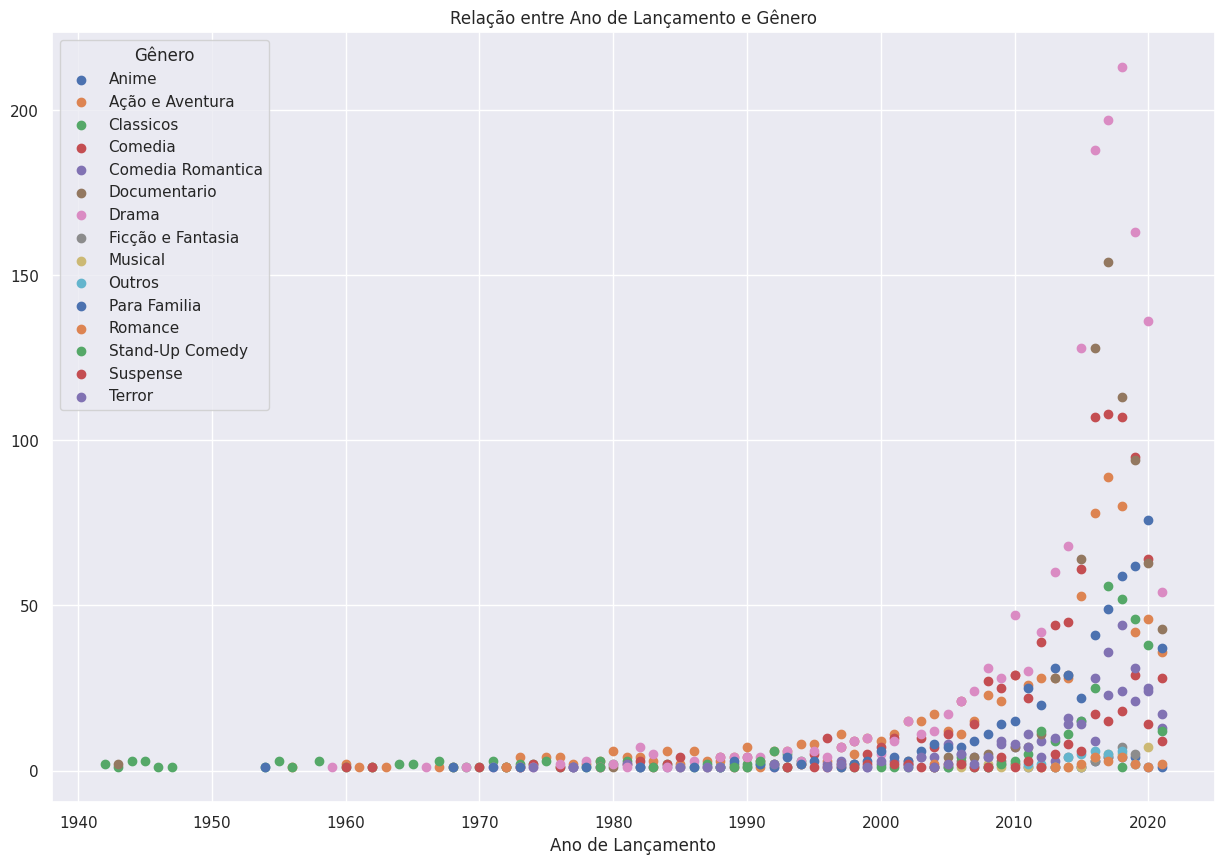

In [ ]:
grupo_lançamento_genero = dados_sem_nulos.groupby(['release_year', 'listed_in']).size().unstack()

plt.figure(figsize=(15, 10))
for genero in grupo_lançamento_genero.columns:
    plt.scatter(grupo_lançamento_genero.index, grupo_lançamento_genero[genero], label=genero)
plt.title('Relação entre Ano de Lançamento e Gênero')
plt.xlabel('Ano de Lançamento')
plt.legend(title='Gênero')
plt.show()


## **📉 Conclusões** <br>

A partir das análises realizadas, podemos constatar que o catálogo da Netflix abriga aproximadamente 26% de filmes do gênero Drama, tornando-o o gênero mais presente em toda a plataforma.

Além disso, observamos que os filmes com maior duração média foram lançados próximo aos anos 1960. Desde o ano 2000, a tendência tem sido filmes mais curtos. Documentários e stand-up comedies têm, em média, uma duração menor em comparação a outros gêneros, mas o gênero do filme não exerce uma influência significativa na duração.

Rajiv Chilaka, criador de séries e desenhos animados, é o profissional com o maior número de filmes presentes no catálogo da Netflix. Seu gênero predominante é "Para família", pois seu trabalho está majoritariamente focado no entretenimento para crianças.

A Netflix apresenta filmes lançados a partir dos anos 1940, mas é a partir dos anos 2000, principalmente nos anos 2010, que a maior parte do seu catálogo se concentra.
